<a href="https://colab.research.google.com/github/Act-Martin-Segovia/ANN---Classification/blob/main/Fashion_MINST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MINST Classification Project**

In [78]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split

## **Importing the data**

In [79]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

print(f'Train Dataset shape: {train_data.shape}')
print(f'Test Dataset shape: {test_data.shape}')

Train Dataset shape: (60000, 785)
Test Dataset shape: (10000, 785)


In [80]:
# Training data
X_train = train_data.drop('label', axis = 1)/255
y_train = train_data['label']

# Testing data
X_test = test_data.drop('label', axis = 1)/255
y_test = test_data['label']

print(f'Features train shape: {X_train.shape}')
print(f'Target train shape: {y_train.shape}')
print(f'\nFeatures test shape: {X_test.shape}')
print(f'Target test shape: {y_test.shape}')

Features train shape: (60000, 784)
Target train shape: (60000,)

Features test shape: (10000, 784)
Target test shape: (10000,)


### Exploring the images

In [73]:
# Image labels dictionary
img_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

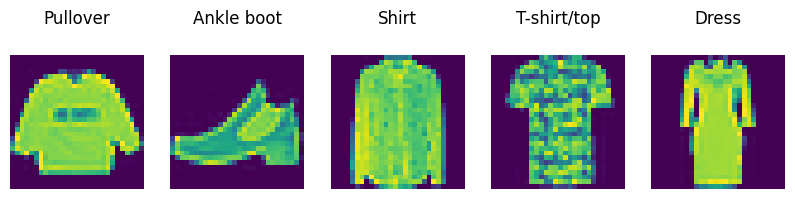

In [43]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for i in range(5):
    axes[i].matshow(X_train.iloc[i].values.reshape(28, 28))
    axes[i].set_title(img_labels[y_train.iloc[i]])
    axes[i].axis('off')

# Show the plot
plt.show()

## **Training the ANN**

In [74]:
X_train_, y_train_, X_val, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [76]:
print(X_train_.shape)
print(X_val.shape)
print(y_train_.shape)
print(y_val.shape)


(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [81]:

model = keras.Sequential([
  keras.layers.Dense(256, input_shape=(784,), activation='relu'),
  #keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

training_history = model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7715 - loss: 0.6573 - val_accuracy: 0.8388 - val_loss: 0.4310
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8598 - loss: 0.3838 - val_accuracy: 0.8670 - val_loss: 0.3677
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8733 - loss: 0.3524 - val_accuracy: 0.8737 - val_loss: 0.3512
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8796 - loss: 0.3206 - val_accuracy: 0.8775 - val_loss: 0.3485
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8894 - loss: 0.2952 - val_accuracy: 0.8683 - val_loss: 0.3589
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8956 - loss: 0.2773 - val_accuracy: 0.8816 - val_loss: 0.3326
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9016 - loss: 0.2652 - val_accuracy: 0.8831 - val_loss: 0.3286
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9039 - loss: 0.2

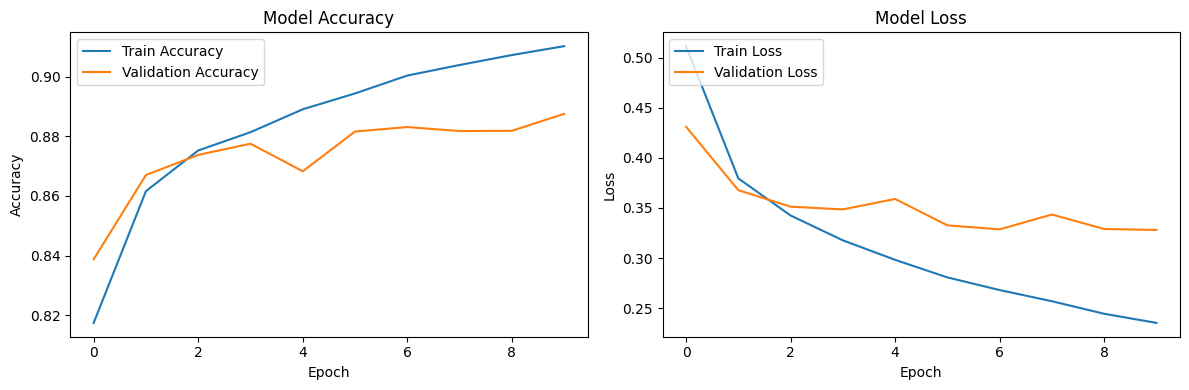

In [82]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Training Loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8863 - loss: 0.3320
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[8.8962287e-01 1.0869221e-06 1.7380069e-03 8.2977735e-05 1.5014068e-04
 2.6358781e-11 1.0836889e-01 3.2216826e-15 3.5955942e-05 7.8182634e-11]


[0, 1, 2, 2, 3]

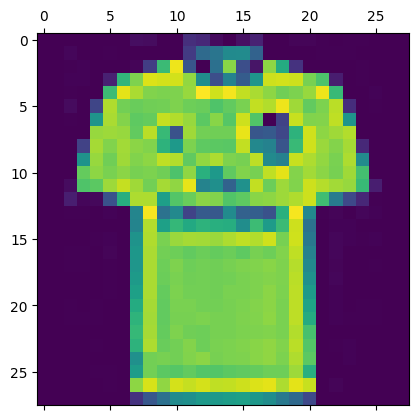

In [63]:
model.evaluate(X_test, y_test)

y_predicted = model.predict(X_test)
print(y_predicted[0])
plt.matshow(X_test.iloc[0].values.reshape(28, 28))


np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

Text(95.72222222222221, 0.5, 'Truth')

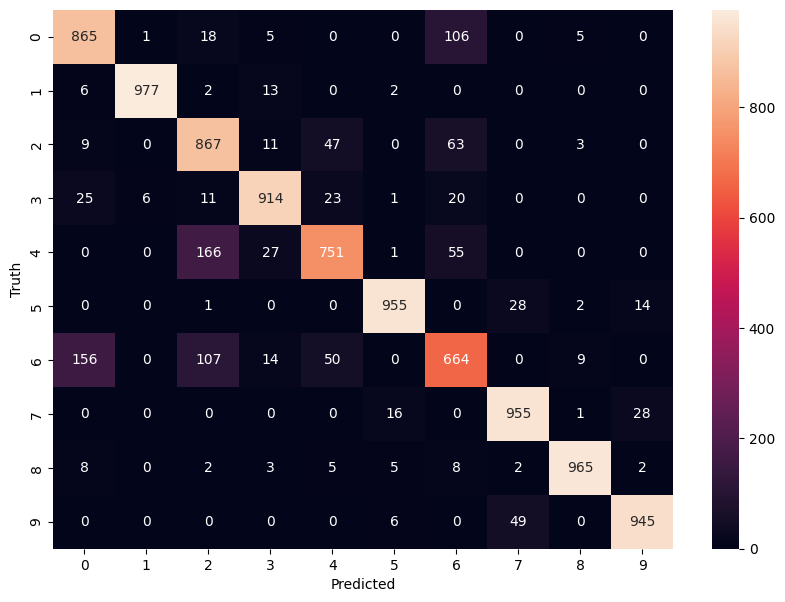

In [58]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')